In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns
import io
import requests
%matplotlib inline
#Опции для вывода данных
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
data = pd.read_csv('data.csv', sep = ';', engine = 'python', encoding='utf-8')

In [3]:
#Определяем тип данных
type(data)

pandas.core.frame.DataFrame

In [4]:
#Выведем кусок данных
data

,№,наличие фотоальбомов,наличие фото,количество фотоальбомов,количество фото,количество лайков на фото,количество комментариев к фото,количество репостов фото,количество описаний фотоальбомов,количество описаний фото,наличие аватара,наличие аудио,количество аудио,наличие интересных страниц,количество интересных страниц,наличие видео,количество видео,количество комментариев к видео,количество репостов видео,количество друзей,количество подписчиков,количество авторских постов,количество репостов авторских постов,количество лайков авторских постов,количество комментариев к авторским постам,количество просмотров авторских постов,количество комментариев НЕ авторских постов,количество лайков НЕ авторских постов,количество подарков,пол,статус,родной город,семейное положение,языки,телефон,доп. телефон,деятельность,интересы,любимые музыка,любимые фильмы,любимые тв-передачи,любимые игры,любимые цитаты,о себе,среднее образование,высшее образование,место работы,адрес работы,год начала работы,год окончания работы,должность,количество мест работы,армия,политические взгляды,мировоззрение,главное в жизни,главное в людях,отношение к курению,отношение к алкоголю,вдохновляют,психотип
0,1,0,1,0,20,1171.0,56.0,0.0,NaN,97.0,1,0,NaN,1,24.0,1,14.0,5.0,0.0,283,513,192.0,30.0,795.0,45.0,17814.0,NaN,NaN,15.0,женский,нашедшая чудо,Казань,женат/замужем,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Делай добро и кидай его в море. Я объявляю вам...,NaN,"Россия, Казань, Гимназия №139, класс б, направ...","Россия, Казань, КГУ им. Ульянова-Ленина , Инст...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Православие,NaN,NaN,NaN,NaN,NaN,5
1,2,1,1,6,1301,13276.0,1605.0,133.0,4.0,523.0,1,0,NaN,1,283.0,1,595.0,4819.0,21898.0,1930,4304,2761.0,3137.0,23707.0,0.0,164849.0,0.0,52.0,NaN,женский,"Рассказываю истории. Иногда лучше, чем люди, с...",Горький-Нижний Новгород,женат/замужем,"Русский,English,Deutsch",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,&quot;Красота - это лучшая проповедь&quot; ***...,О себе вслух не говорят :),"Россия, Нижний Новгород, Школа №110, класс ж, ...","Россия, Нижний Новгород, ННГУ им. Лобачевского...",Журнал &quot;Русский Мир&quot;,Москва,2010.0,NaN,корреспондент от Нижегородского региона,7.0,NaN,NaN,"Бог един, религии придумали люди",NaN,NaN,резко негативное,резко негативное,Медитация. Музыка. Слова. Природа. Доброта чел...,8
2,3,1,1,1,236,3722.0,236.0,0.0,0.0,164.0,1,0,NaN,1,64.0,1,510.0,6402.0,7075.0,156,664,17.0,0.0,69.0,0.0,1626.0,NaN,NaN,NaN,женский,"люди, сады, люди, статуи",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,4,1,1,6,997,1093.0,988.0,9.0,4.0,997.0,1,1,718.0,1,31.0,1,284.0,172.0,56.0,300,236,482.0,50.0,922.0,0.0,8380.0,NaN,NaN,24.0,женский,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
4,5,0,1,0,80,3768.0,216.0,9.0,NaN,157.0,1,0,NaN,1,10.0,1,119.0,3375.0,4039.0,291,368,713.0,184.0,7580.0,0.0,36812.0,NaN,NaN,NaN,женский,"Тот, у кого в душе светит солнце, будет видеть...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
5,6,1,1,4,605,866.0,225.0,0.0,2.0,605.0,1,1,1094.0,1,51.0,1,226.0,339.0,50.0,186,274,431.0,114.0,875.0,0.0,15231.0,0.0,11.0,22.0,женский,"&quot;Любовь отвергнута, Душа уволена, Ничто н...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
6,7,0,1,0,85,941.0,142.0,2.0,NaN,85.0,1,1,117.0,1,34.0,1,112.0,351.0,1096.0,425,90,473.0,87.0,1625.0,0.0,30451.0,NaN,NaN,5.0,мужской,"Созидание - это то, ради чего стоит прожить жизнь",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
7,8,1,1,2,341,3259.0,414.0,5.0,1.0,340.0,1,1,139.0,1,61.0,1,101.0,66.0,192.0,368,196,2112.0,294.0,6570.0,0.0,49458.0,NaN,NaN,47.0,женский,"Время, СТОЙ!!!!!",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
#Выкидываем столбец "№" так как у нас есть и обычная индексация, тем более она где-то разъехалась (см. последнюю строчку 9198	10341)
#Также уберем столбец "год окончания работы", он полностью пустой и не скажется на анализе

data = data.drop(columns = ['№','год окончания работы'])

In [6]:
#Выведем размер данных
print(data.shape)

(9199, 59)


In [7]:
#Выведем названия колонок
print('\n'.join([x for x in data.columns]))

наличие фотоальбомов
наличие фото
количество фотоальбомов
количество фото
количество лайков на фото
количество комментариев к фото
количество репостов фото
количество описаний фотоальбомов
количество описаний фото
наличие аватара
наличие аудио
количество аудио
наличие интересных страниц
количество интересных страниц
наличие видео
количество видео
количество комментариев к видео
количество репостов видео
количество друзей
количество подписчиков
количество авторских постов
количество репостов авторских постов
количество лайков авторских постов
количество комментариев к авторским постам
количество просмотров авторских постов
количество комментариев НЕ авторских постов
количество лайков НЕ авторских постов
количество подарков
пол
статус
родной город
семейное положение
языки
телефон
доп. телефон
деятельность
интересы
любимые музыка
любимые фильмы
любимые тв-передачи
любимые игры
любимые цитаты
о себе
среднее образование
высшее образование
место работы
адрес работы
год начала работы
должност

In [8]:
#посмотрим общую информацию по набору
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9199 entries, 0 to 9198
Data columns (total 59 columns):
наличие фотоальбомов                           9199 non-null int64
наличие фото                                   9199 non-null int64
количество фотоальбомов                        9199 non-null int64
количество фото                                9199 non-null int64
количество лайков на фото                      8898 non-null float64
количество комментариев к фото                 8898 non-null float64
количество репостов фото                       8898 non-null float64
количество описаний фотоальбомов               4694 non-null float64
количество описаний фото                       8898 non-null float64
наличие аватара                                9199 non-null int64
наличие аудио                                  9199 non-null int64
количество аудио                               3714 non-null float64
наличие интересных страниц                     9199 non-null int64
количество

In [9]:
# основные статистические характеристики данных по каждому числовому признаку
data.describe()

,наличие фотоальбомов,наличие фото,количество фотоальбомов,количество фото,количество лайков на фото,количество комментариев к фото,количество репостов фото,количество описаний фотоальбомов,количество описаний фото,наличие аватара,наличие аудио,количество аудио,наличие интересных страниц,количество интересных страниц,наличие видео,количество видео,количество комментариев к видео,количество репостов видео,количество друзей,количество подписчиков,количество авторских постов,количество репостов авторских постов,количество лайков авторских постов,количество комментариев к авторским постам,количество просмотров авторских постов,количество комментариев НЕ авторских постов,количество лайков НЕ авторских постов,количество подарков,год начала работы,количество мест работы,психотип
count,9199.000000,9199.000000,9199.000000,9199.000000,8898.000000,8898.000000,8898.000000,4694.000000,8898.000000,9199.000000,9199.000000,3714.000000,9199.000000,9019.000000,9199.000000,7940.000000,7940.000000,7940.000000,9199.000000,9199.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,1716.000000,1716.000000,4097.000000,308.000000,651.000000,9199.000000
mean,0.510273,0.967279,2.125992,163.035439,1412.286469,110.442909,2.578445,1.541116,250.599461,0.960322,0.403740,626.382876,0.980433,127.447611,0.863137,243.155919,11729.261083,16099.313854,174.082618,179.721926,679.856535,59.135242,1440.058884,50.882232,10689.247577,50.604312,78.084499,48.017818,2012.064935,1.499232,6.497554
std,0.499922,0.177915,5.903855,727.407923,2869.529373,291.053312,15.119054,3.516833,835.481724,0.195213,0.490673,895.496427,0.138516,165.927999,0.343721,557.382410,35348.900262,41776.424333,377.755321,402.916853,2276.242036,213.593233,3331.130959,344.551930,24676.840280,190.460538,183.208799,82.842918,8.053304,1.131880,2.690243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1941.000000,1.000000,1.000000
25%,0.000000,1.000000,0.000000,7.000000,113.000000,2.000000,0.000000,0.000000,5.000000,1.000000,0.000000,106.000000,1.000000,38.000000,1.000000,15.000000,112.000000,176.000000,52.000000,32.000000,13.000000,1.000000,69.250000,0.000000,1061.000000,0.000000,3.000000,4.000000,2010.000000,1.000000,4.000000
50%,1.000000,1.000000,1.000000,32.000000,486.000000,20.000000,0.000000,1.000000,40.000000,1.000000,0.000000,337.000000,1.000000,81.000000,1.000000,67.000000,1594.000000,2365.500000,104.000000,98.000000,93.000000,7.000000,351.000000,0.000000,3906.500000,3.000000,14.000000,22.000000,2014.000000,1.000000,7.000000
75%,1.000000,1.000000,2.000000,123.000000,1494.750000,95.000000,1.000000,2.000000,164.000000,1.000000,1.000000,776.750000,1.000000,157.000000,1.000000,231.000000,8660.500000,12215.250000,188.000000,208.000000,480.000000,37.000000,1374.750000,3.000000,10728.000000,24.000000,69.000000,62.000000,2016.000000,1.000000,9.000000
max,1.000000,1.000000,206.000000,40860.000000,79267.000000,6677.000000,594.000000,68.000000,13652.000000,1.000000,1.000000,10000.000000,1.000000,2831.000000,1.000000,9572.000000,695359.000000,453482.000000,9805.000000,22529.000000,71564.000000,6090.000000,65384.000000,11203.000000,701396.000000,3457.000000,2466.000000,1868.000000,2018.000000,7.000000,10.000000


In [10]:

data.describe(include=['object', 'bool'])

,пол,статус,родной город,семейное положение,языки,телефон,доп. телефон,деятельность,интересы,любимые музыка,любимые фильмы,любимые тв-передачи,любимые игры,любимые цитаты,о себе,среднее образование,высшее образование,место работы,адрес работы,должность,армия,политические взгляды,мировоззрение,главное в жизни,главное в людях,отношение к курению,отношение к алкоголю,вдохновляют
count,9199,4139,2318,1512,701,1071,546,456,649,721,700,395,507,684,589,2074,1513,593,546,273,251,904,1123,1203,1244,1264,1244,620
unique,2,3955,1022,487,163,989,393,428,624,665,686,352,480,682,583,2069,1491,576,219,233,250,9,308,8,6,5,5,513
top,женский,...,Москва,не женат/не замужем,"Русский,English",-,нет,Студент,Футбол,рок,много,нет,-,-,-,"Россия, Томск, Академический лицей","Россия, Воронеж, ВГПУ",🔔 Эта страница официально подтверждена,Москва,Администратор,не служил,умеренные,Православие,саморазвитие,доброта и честность,нейтральное,нейтральное,Музыка
freq,5542,25,135,402,346,10,39,6,5,9,5,12,5,3,3,2,3,5,69,6,2,358,481,484,593,359,413,46


In [ ]:
data.columns

In [11]:

#print(data)
#print(corr["your_target_variable"].sort_values(ascending=False))

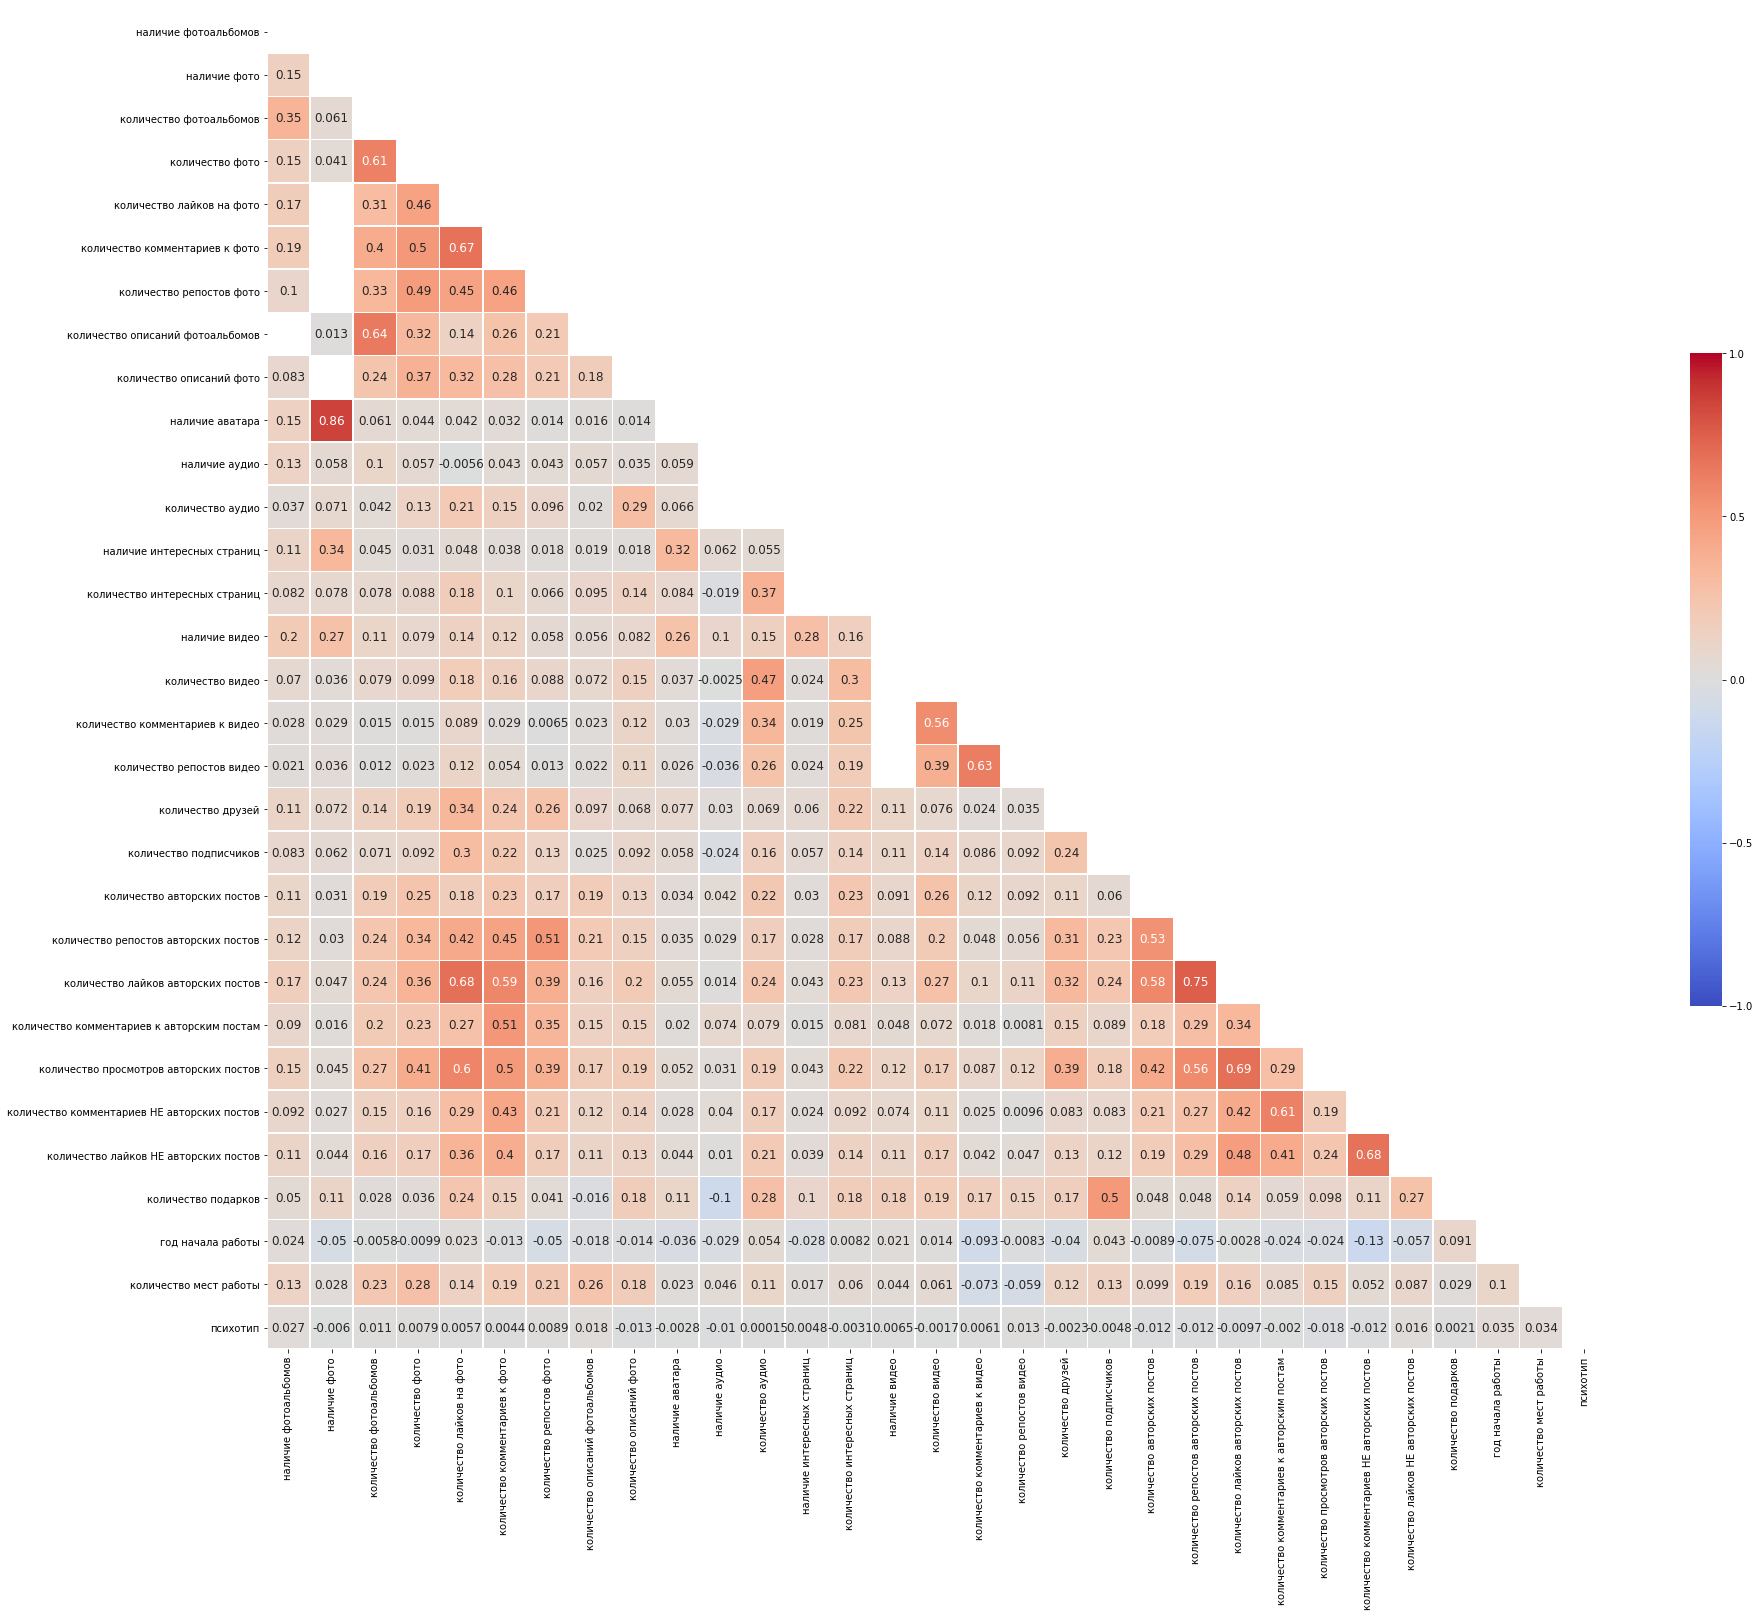

In [12]:
#Вычислим корелляцию между признаками
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(30, 30)) 
heatmap = sns.heatmap(corr, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


In [50]:
#Можно видеть насколько разнообразие "телефонов"
data['телефон'].value_counts()

-                           10
***********                  8
есть                         6
89*********                  6
0                            4
...                          4
нету                         4
8                            4
*****                        3
нет                          3
Nokia                        3
123456789                    3
*********                    3
не скажу                     3
2                            3
кому надо тот знает          3
LG                           3
88005553535                  3
+79*********                 3
*************                2
1                            2
************                 2
nokia                        2
.                            2
........................     2
102                          2
+7**********                 2
Н                            2
китайский                    2
iPhone X                     2
iphone                       2
кому надо тот спросит        2
911     

In [ ]:
 #Посмотрим частотную диаграмму как часто люди оставляют телефон в анкете

fig, ax = plt.subplots()
plt.figure(figsize=(150,10))
data['телефон'].value_counts().plot(ax=ax, kind='bar')
#describe(include=['object', 'bool','int64'])

In [51]:
#Просто удобно для копирования в последующее
data.columns

Index(['наличие фотоальбомов', 'наличие фото', 'количество фотоальбомов',
       'количество фото', 'количество лайков на фото',
       'количество комментариев к фото', 'количество репостов фото',
       'количество описаний фотоальбомов', 'количество описаний фото',
       'наличие аватара', 'наличие аудио', 'количество аудио',
       'наличие интересных страниц', 'количество интересных страниц',
       'наличие видео', 'количество видео', 'количество комментариев к видео',
       'количество репостов видео', 'количество друзей',
       'количество подписчиков', 'количество авторских постов',
       'количество репостов авторских постов',
       'количество лайков авторских постов',
       'количество комментариев к авторским постам',
       'количество просмотров авторских постов',
       'количество комментариев НЕ авторских постов',
       'количество лайков НЕ авторских постов', 'количество подарков', 'пол',
       'статус', 'родной город', 'семейное положение', 'языки', 'телефон

In [73]:
#Отбираем столбцы анкеты 
profile = data.loc[:,['статус', 'родной город', 'семейное положение', 'языки', 'телефон','доп. телефон', 'деятельность', 'интересы', 'любимые музыка', 'любимые фильмы', 'любимые тв-передачи', 'любимые игры', 'любимые цитаты', 'о себе', 'среднее образование', 'высшее образование', 'место работы', 'адрес работы', 'год начала работы', 'должность', 'количество мест работы', 'армия', 'политические взгляды', 'мировоззрение', 'главное в жизни', 'главное в людях', 'отношение к курению', 'отношение к алкоголю', 'вдохновляют']]
#Столбец заполненности анкеты (взяли столбцы и проверили сколько из столбцов не пустота и делим на количество этих столбцов)
tmp = profile.apply(lambda x: sum(x.isnull().values)/31, axis = 1)
#Добавляем в основной сет 
data.insert(29, "Fullness_profile", tmp, True) 
#profile.isnull().values.sum

In [97]:
psyhotype = data['психотип']#Взяли психотип
data1=data.drop(columns = ['психотип','пол','статус', 'родной город', 'семейное положение', 'языки', 'телефон','доп. телефон', 'деятельность', 'интересы', 'любимые музыка', 'любимые фильмы', 'любимые тв-передачи', 'любимые игры', 'любимые цитаты', 'о себе', 'среднее образование', 'высшее образование', 'место работы', 'адрес работы', 'год начала работы', 'должность', 'количество мест работы', 'армия', 'политические взгляды', 'мировоззрение', 'главное в жизни', 'главное в людях', 'отношение к курению', 'отношение к алкоголю', 'вдохновляют'])
data1 = data1.replace(np.NaN,0) #Заменили пропуски нулями NaN -> 0
from sklearn import preprocessing
# Нормализую данные
normalized_X = preprocessing.normalize(data1)
normalized_X = pd.DataFrame(normalized_X)
normalized_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.000000,0.000056,0.000000,0.001118,0.065488,0.003132,0.000000,0.000000,0.005425,0.000056,0.000000,0.000000,0.000056,0.001342,0.000056,0.000783,0.000280,0.000000,0.015827,0.028689,0.010738,0.001678,0.044460,0.002517,0.996239,0.000000,0.000000,0.000839,0.000040
1,0.000006,0.000006,0.000036,0.007712,0.078694,0.009514,0.000788,0.000024,0.003100,0.000006,0.000000,0.000000,0.000006,0.001677,0.000006,0.003527,0.028565,0.129802,0.011440,0.025512,0.016366,0.018595,0.140525,0.000000,0.977151,0.000000,0.000308,0.000000,0.000002
2,0.000096,0.000096,0.000096,0.022666,0.357470,0.022666,0.000000,0.000000,0.015751,0.000096,0.000000,0.000000,0.000096,0.006147,0.000096,0.048982,0.614863,0.679500,0.014983,0.063772,0.001633,0.000000,0.006627,0.000000,0.156165,0.000000,0.000000,0.000000,0.000087
3,0.000115,0.000115,0.000687,0.114180,0.125175,0.113150,0.001031,0.000458,0.114180,0.000115,0.000115,0.082228,0.000115,0.003550,0.000115,0.032525,0.019698,0.006413,0.034357,0.027028,0.055201,0.005726,0.105591,0.000000,0.959710,0.000000,0.000000,0.002749,0.000103
4,0.000000,0.000026,0.000000,0.002097,0.098771,0.005662,0.000236,0.000000,0.004115,0.000026,0.000000,0.000000,0.000026,0.000262,0.000026,0.003119,0.088469,0.105875,0.007628,0.009646,0.018690,0.004823,0.198695,0.000000,0.964957,0.000000,0.000000,0.000000,0.000024
5,0.000065,0.000065,0.000260,0.039386,0.056377,0.014648,0.000000,0.000130,0.039386,0.000065,0.000065,0.071220,0.000065,0.003320,0.000065,0.014713,0.022069,0.003255,0.012109,0.017837,0.028058,0.007421,0.056963,0.000000,0.991541,0.000000,0.000716,0.001432,0.000059
6,0.000000,0.000033,0.000000,0.002783,0.030814,0.004650,0.000065,0.000000,0.002783,0.000033,0.000033,0.003831,0.000033,0.001113,0.000033,0.003668,0.011494,0.035889,0.013917,0.002947,0.015489,0.002849,0.053212,0.000000,0.997137,0.000000,0.000000,0.000164,0.000030
7,0.000020,0.000020,0.000040,0.006813,0.065114,0.008272,0.000100,0.000020,0.006793,0.000020,0.000020,0.002777,0.000020,0.001219,0.000020,0.002018,0.001319,0.003836,0.007353,0.003916,0.042197,0.005874,0.131267,0.000000,0.988156,0.000000,0.000000,0.000939,0.000018
8,0.000207,0.000207,0.000207,0.006403,0.079312,0.014251,0.000000,0.000207,0.006403,0.000207,0.000207,0.021893,0.000207,0.004957,0.000207,0.004337,0.035938,0.343065,0.079932,0.061343,0.049363,0.023752,0.161929,0.000000,0.913533,0.000000,0.000000,0.000000,0.000187
9,0.000124,0.000124,0.000248,0.018700,0.075915,0.002725,0.000743,0.000000,0.018700,0.000124,0.000000,0.000000,0.000124,0.006316,0.000124,0.098454,0.179817,0.178207,0.037524,0.028236,0.037152,0.027617,0.077772,0.000000,0.953576,0.000000,0.000000,0.000000,0.000112


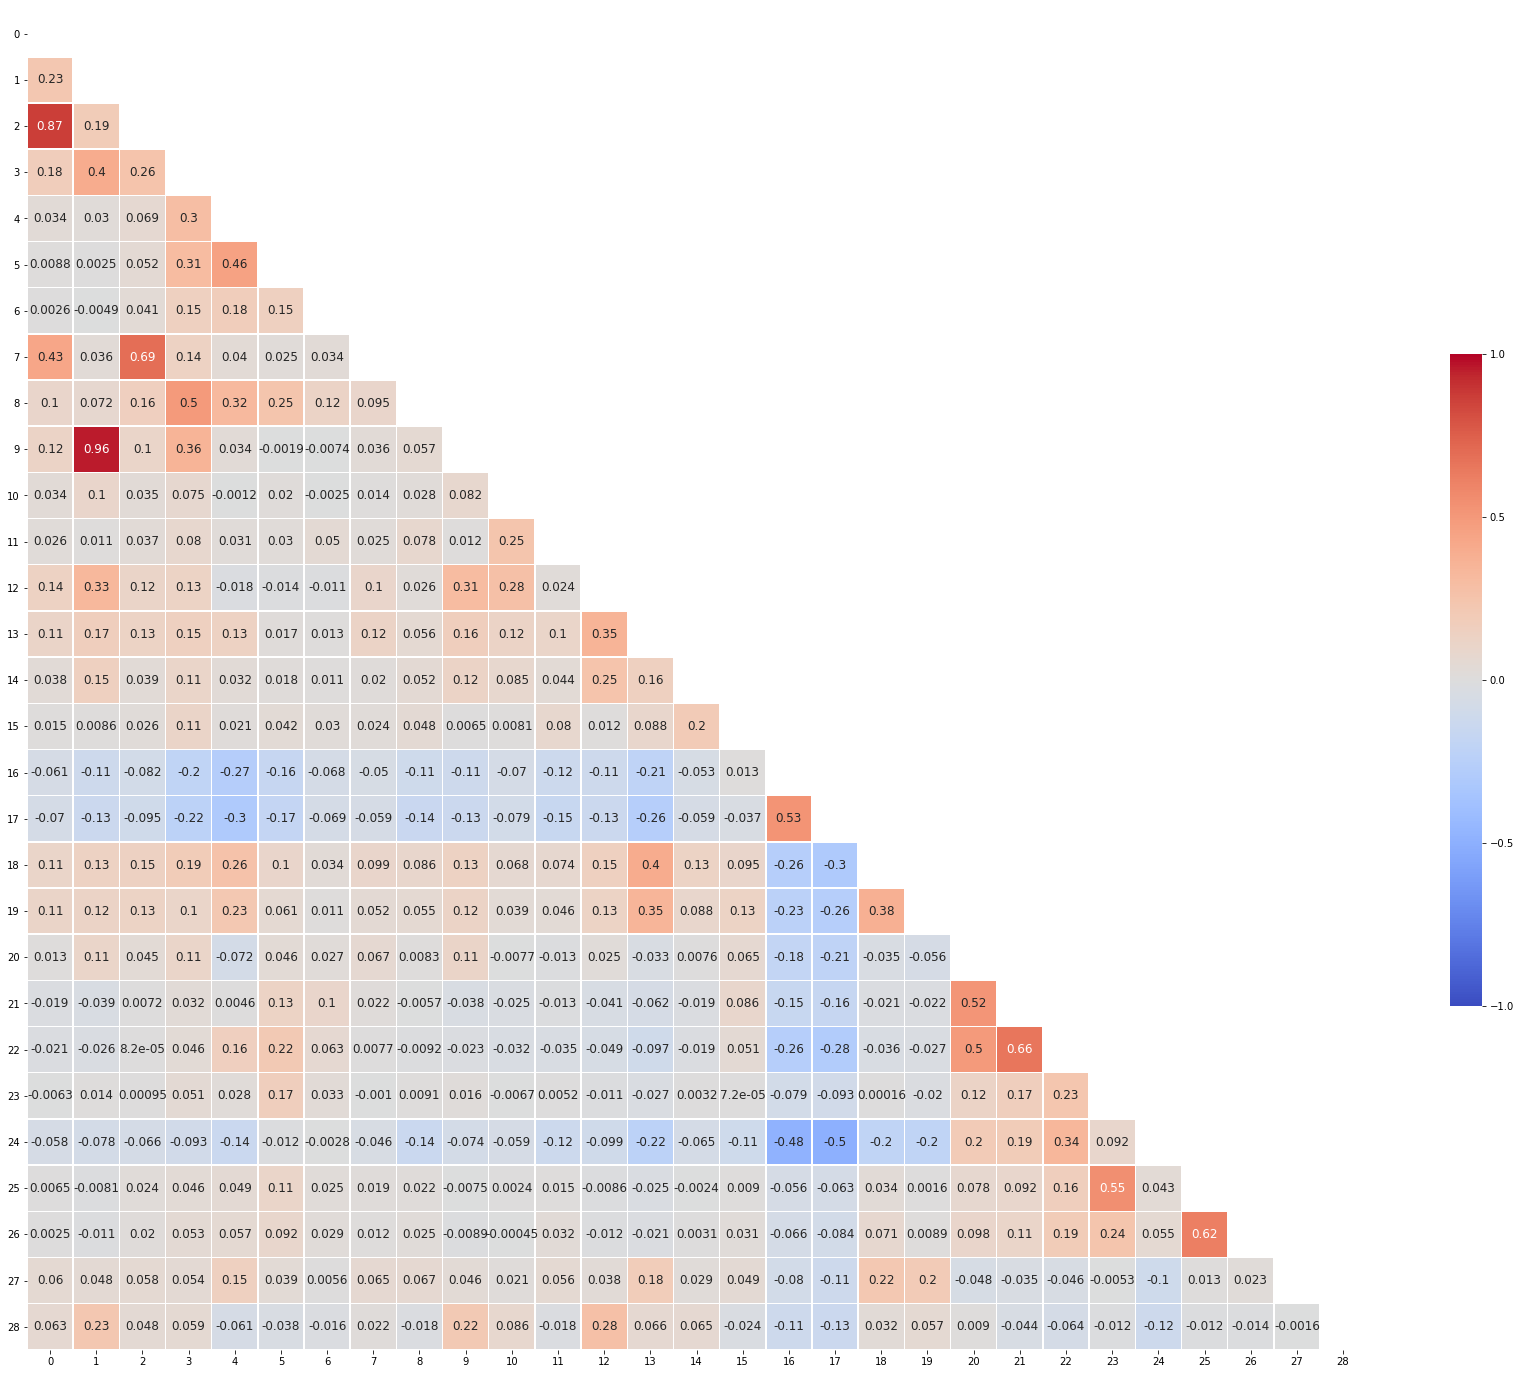

In [98]:
#Вычислим корелляцию между признаками
corr = normalized_X.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(30, 30)) 
heatmap = sns.heatmap(corr, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


In [100]:
#Разбиваем на тренировочную выборку и тестовую имеющийся сет
#X_train, y_train – это обучающая выборка, X_test, y_test – тестовая.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( normalized_X, psyhotype, test_size = 0.3, random_state = 1)

In [86]:
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
#Полученная размерность
print(N_train, N_test)

6439 2760


In [101]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [102]:
# Получаем ошибку
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.square(y_train-y_train_predict).mean()
err_test  = np.square(y_test-y_test_predict).mean()


print("Вариант1: ",err_train, err_test)


# Другой Вариант подсчета
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = 1 - knn.score(X_train, y_train)
err_test = 1 - knn.score(X_test, y_test)

print("Вариант2: ",err_train, err_test)

Вариант1:  5.86291038981203 8.445666666666654
Вариант2:  0.8045938705800204 1.186305872135396


In [89]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15]
knn_r = KNeighborsRegressor()
grid = GridSearchCV(knn_r, param_grid = {'n_neighbors': nnb}, cv = 10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

1.066877546677457 15


In [90]:
knn = KNeighborsRegressor(n_neighbors = best_n_neighbors).fit(X_train, y_train)

# Получаем ошибку
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.square(y_train-y_train_predict).mean()
err_test  = np.square(y_test-y_test_predict).mean()


print("Вариант1: ",err_train, err_test)


# Другой Вариант подсчета
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = 1 - knn.score(X_train, y_train)
err_test = 1 - knn.score(X_test, y_test)

print("Вариант2: ",err_train, err_test)

Вариант1:  6.778710979965777 7.5330740740740865
Вариант2:  0.9302733527006554 1.0581201416077262
